In [1]:
# IMPORT RELEVANT PACKAGES

import numpy as np
import pandas as pd
import os

#import geopandas as gdp - not sure why this doesn't import

import folium as flm
import seaborn as sns
import json


import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc,rcParams
import matplotlib.font_manager as font_manager
from matplotlib import cm



import itertools
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 

import numpy_financial as npf

!pip install geopandas
!pip3 install geopandas
!pip install --upgrade matplotlib

import matplotlib.patches as mpatches

from CEM_functions import *




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Outputs from CEM

### read in the results files

In [2]:
CEM_dir = ''
CEM_dir_index = 39

CEM_scenarios_dict = create_sensitivity_dict(CEM_dir)

CEM_min_hours_dict = create_UP_min_hours_dict(CEM_scenarios_dict,CEM_dir,CEM_dir_index)
results_df = pd.DataFrame(CEM_min_hours_dict[0]).T.reset_index()

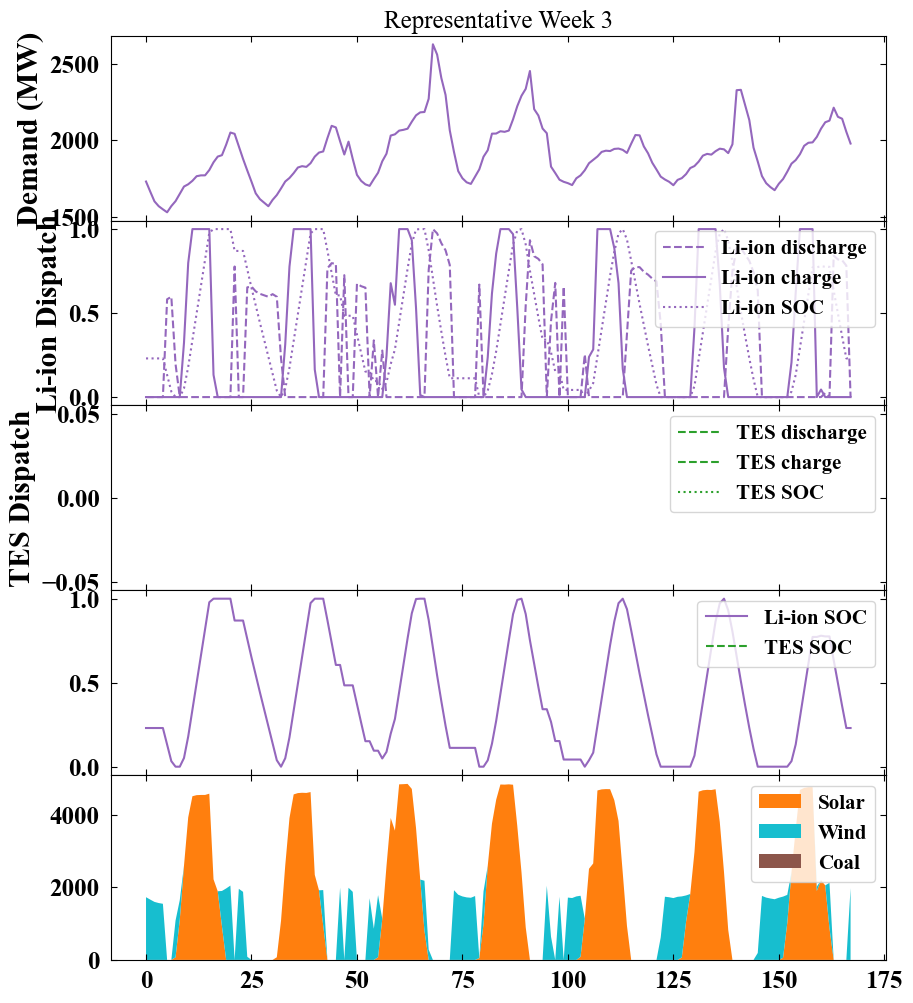

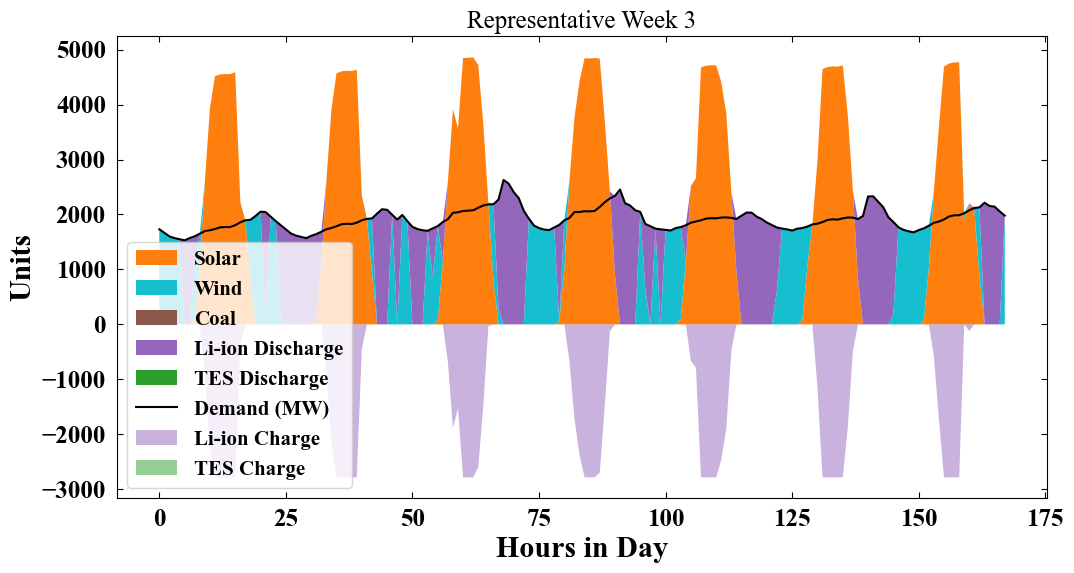

In [3]:
n=3
plot_dispatch_separate(n,results_df)
plot_dispatch(n,results_df)

/Users/serenapatel/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/GitHub/Thermal-Energy-System-Dispatch-and-Sizing-Optimization/TrombayU5_repweeks/RESULTS/CEM_age_0/CEM_functions.py:333: RuntimeWarning: invalid value encountered in divide
  SOC_array = SOC_array + list(SOC_week / results_df["tank_energy_max"][0])


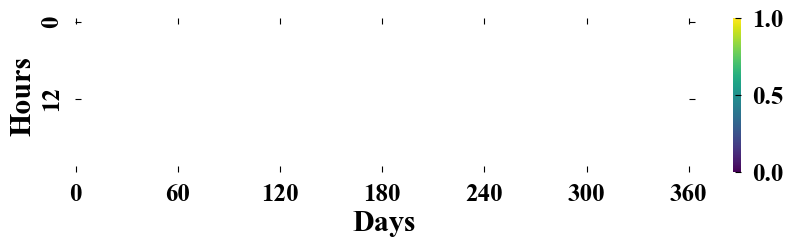

In [4]:
plot_storage_heatmap(results_df)

In [5]:
## make the dfs
curtailment_df = create_curtailment_df(CEM_min_hours_dict)
generation_df = create_generation_df(CEM_min_hours_dict)
capacity_df = create_capacity_df(CEM_min_hours_dict)
E_storage_df = create_E_storage_df(CEM_min_hours_dict)
P_storage_df = create_P_storage_df(CEM_min_hours_dict)
storage_dispatch_df = create_storage_dispatch_df(CEM_min_hours_dict)
conversions_df = create_conversions_df(CEM_min_hours_dict)

emissions_df = create_emissions_df(CEM_min_hours_dict)
syscost_df = create_syscost_df(CEM_min_hours_dict)



In [8]:
capacity_df[capacity_df.TES>0]

,Label,Solar,Wind,Coal,TES,Li-ion
1,CEM_TES_life20emissions0,11140.936998,4070.752603,0.0,3.192782e+02,3223.161428
7,CEM_TES_life30emissions0,11136.089533,4105.138235,0.0,3.471702e+02,3224.498609
8,CEM_TES_life5emissions0,11136.591166,4096.135818,0.0,1.894953e+02,3223.804545
9,CEM_TES_life35emissions0,11143.272222,4056.588454,0.0,3.578857e+02,3222.762311
10,CEM_TES_life40emissions0,11140.848656,4073.207689,0.0,3.551551e+02,3223.372429
12,CEM_TES_life10emissions0,11137.788349,4089.074338,0.0,2.470500e+02,3223.620342
13,CEM_TES_life15emissions0,11131.959019,4128.415441,0.0,2.454933e+02,3225.023267
15,CEM_TES_life25emissions0,11140.817650,4073.224854,0.0,3.551563e+02,3223.360285
17,CEM_TES_life15emissions10,10392.720889,3871.025764,500.0,6.439294e-15,3522.856868


Text(64.33333333333333, 0.5, 'System Cost (USD/year)')

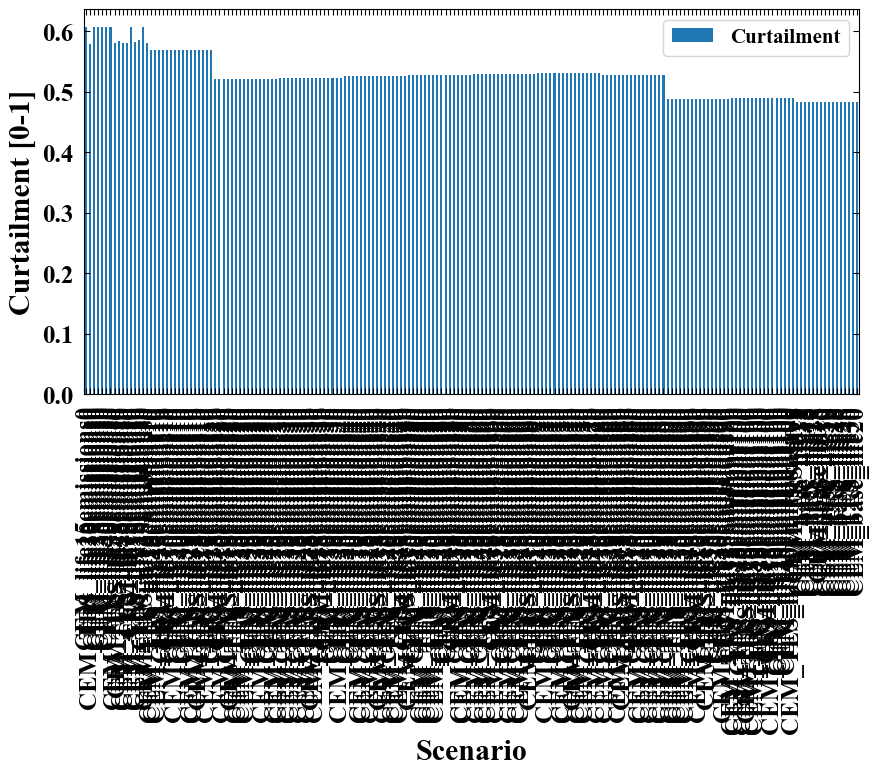

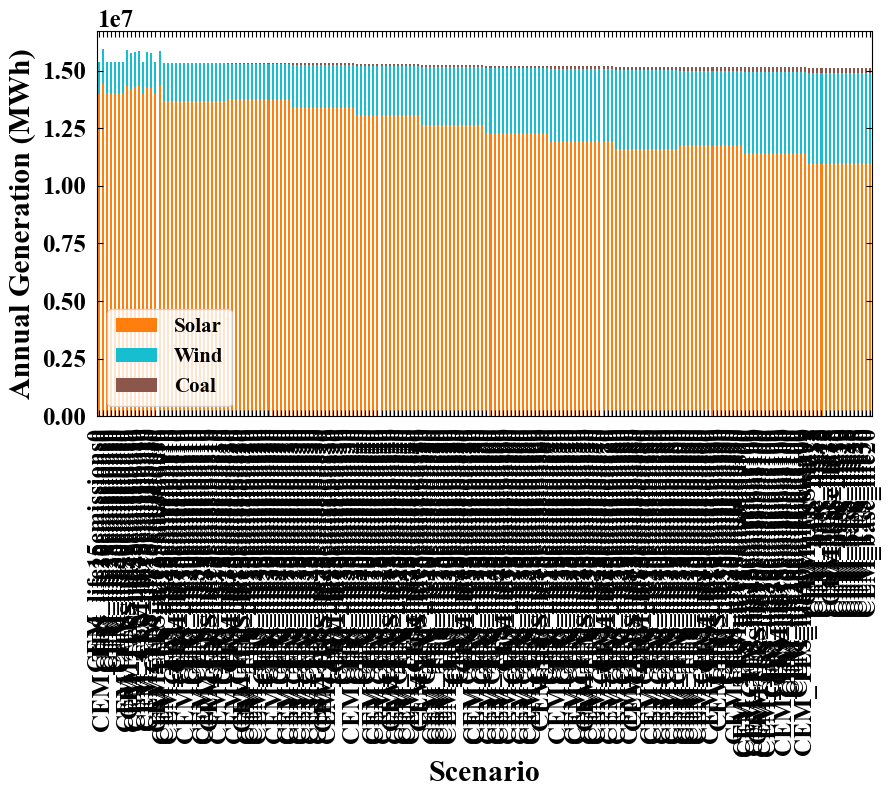

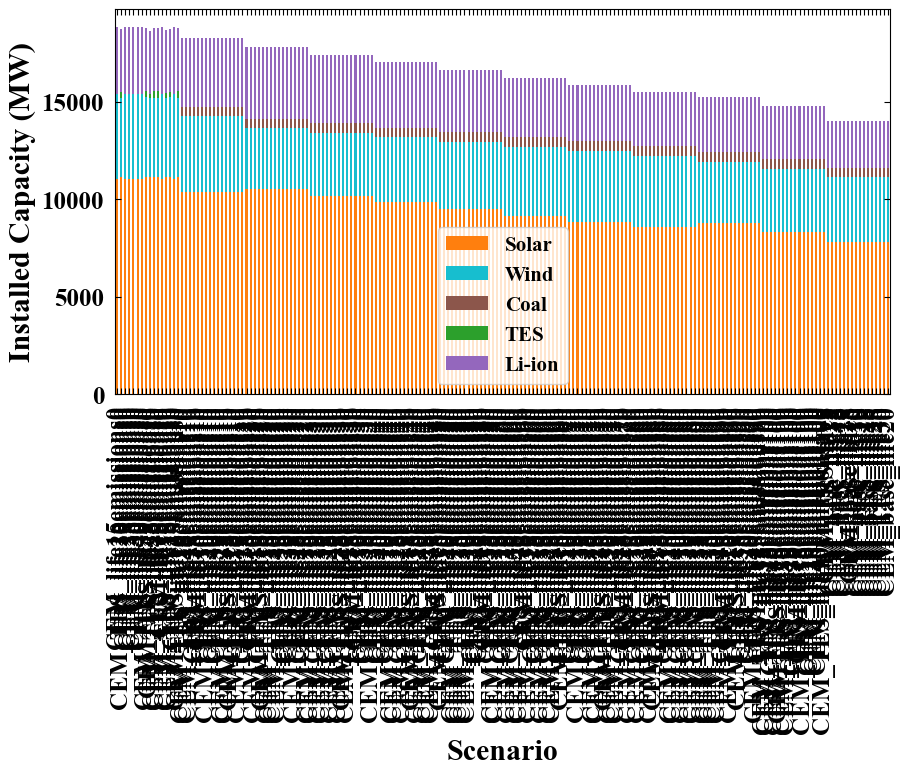

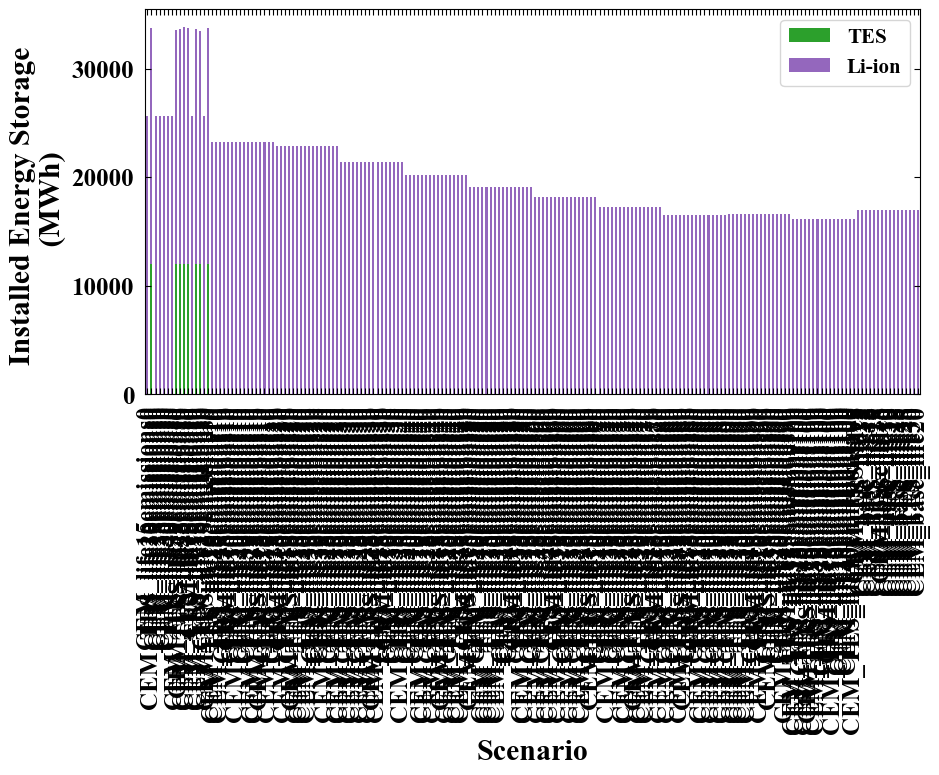

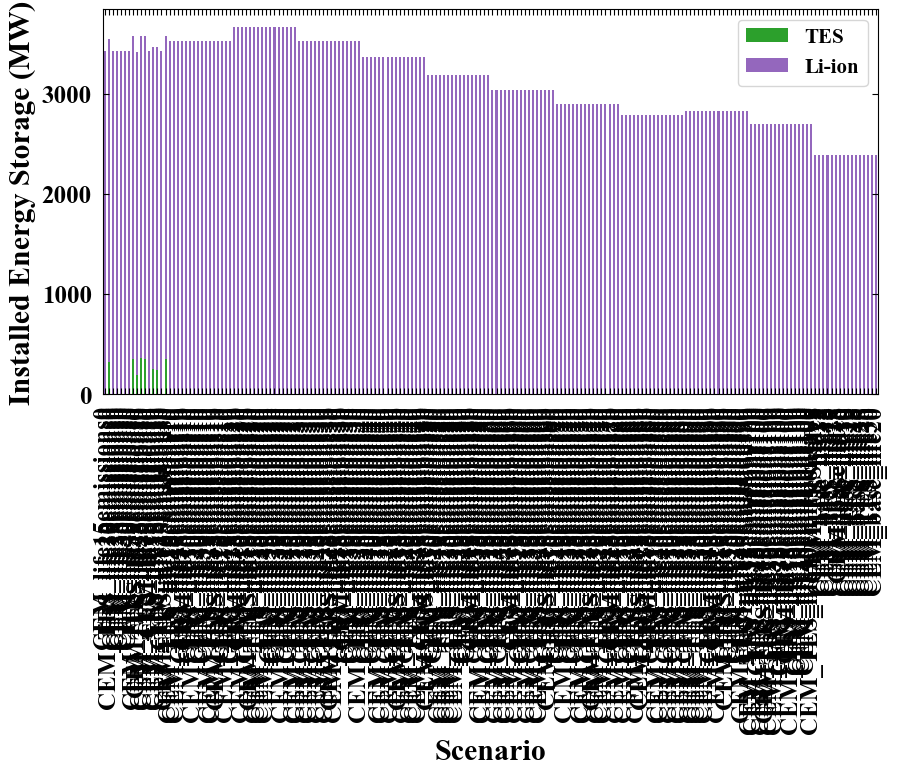

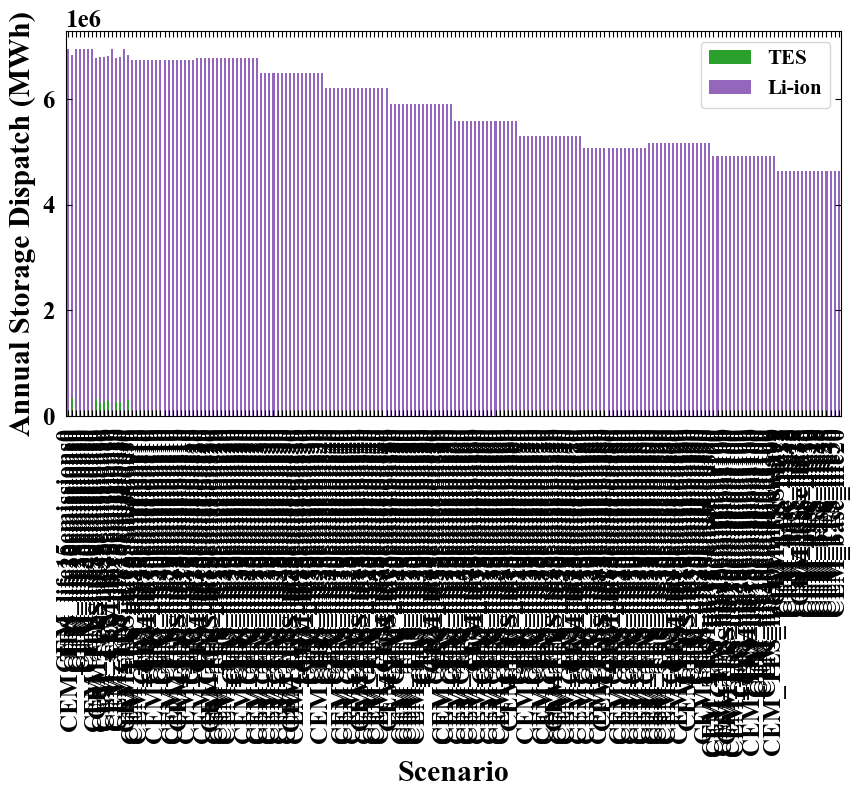

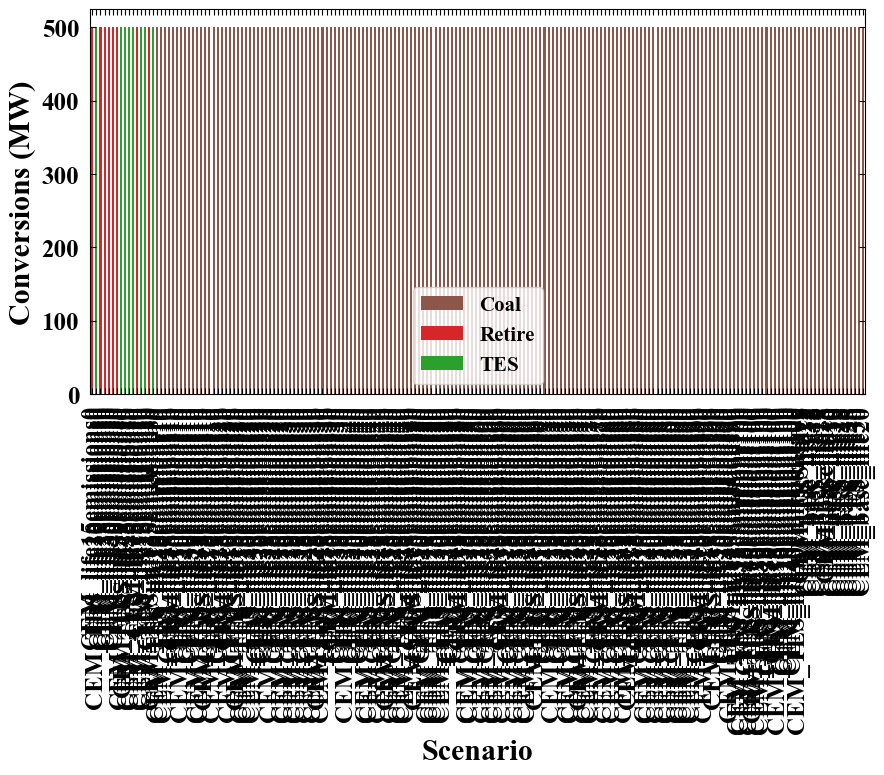

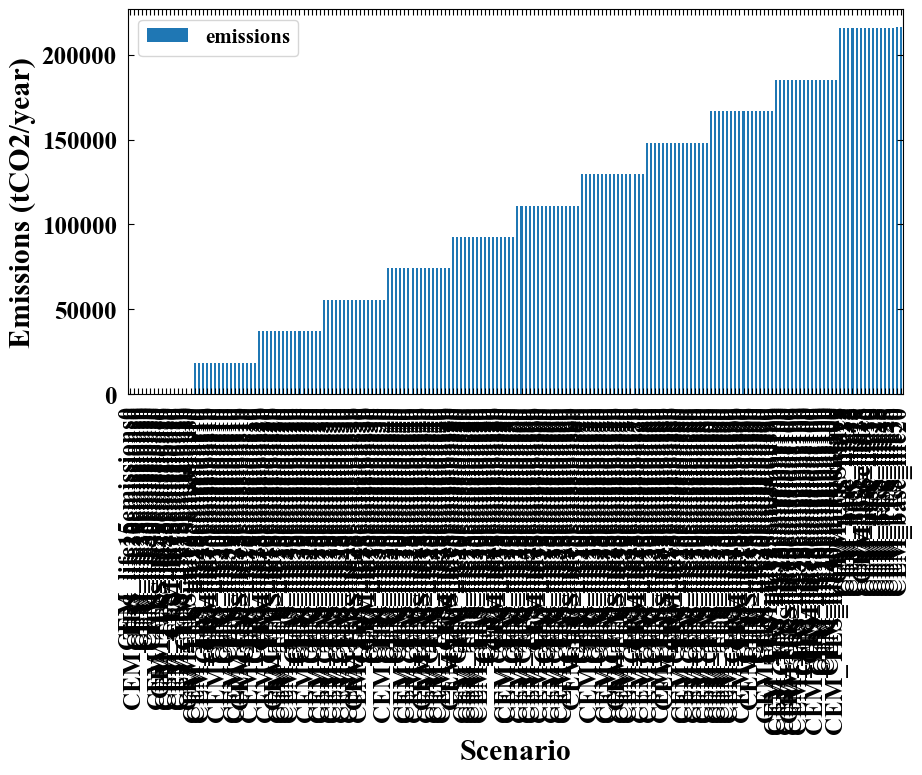

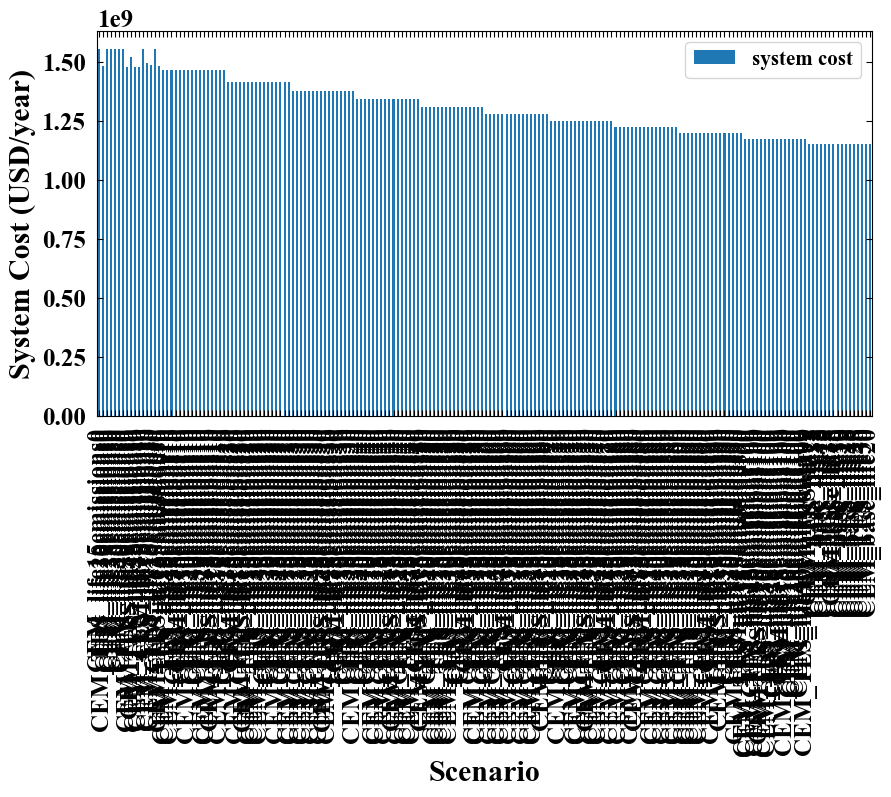

In [6]:
#plots 
plot_stacked(curtailment_df,'curtailment')
plt.ylabel('Curtailment [0-1]')


plot_stacked(generation_df,'generation')
plt.ylabel('Annual Generation (MWh)')

plot_stacked(capacity_df,'capacity')
plt.ylabel('Installed Capacity (MW)')


plot_stacked(E_storage_df,'e_storage')
plt.ylabel('Installed Energy Storage \n (MWh)')

plot_stacked(P_storage_df,'p_storage')
plt.ylabel('Installed Energy Storage (MW)')

plot_stacked(storage_dispatch_df,'storage_dis')
plt.ylabel('Annual Storage Dispatch (MWh)')

plot_stacked(conversions_df,'conversions')
plt.ylabel('Conversions (MW)')


plot_stacked(emissions_df,'emissions')
plt.ylabel('Emissions (tCO2/year)')

plot_stacked(syscost_df,'syscost')
plt.ylabel('System Cost (USD/year)')


## check if it's forced at intermediate steps check if its larger than objective function 

## under 0 emissions, 2-3 limits
## age, efficiency, reduced storage cost 

#flat case
## 4 plots 

In [ ]:
emissions_syscost_df=create_emissions_syscost_df(CEM_min_hours_dict)
plot_emissions_systemcost(emissions_syscost_df,'emissions_test')

In [ ]:
all_LCOE_df = create_LCOE_df(CEM_min_hours_dict)
sns.heatmap(all_LCOE_df.set_index('Label'))
plt.title('LCOE')

In [ ]:
all_LCOE_df  #$/kWh

In [ ]:
relative_gap(CEM_min_hours_dict).plot(kind='bar')#,label='Label')

In [ ]:
emissions_df

In [10]:
capacity_df[capacity_df.TES>0]

,Label,Solar,Wind,Coal,TES,Li-ion
1,CEM_TES_life20emissions0,11140.936998,4070.752603,0.0,3.192782e+02,3223.161428
7,CEM_TES_life30emissions0,11136.089533,4105.138235,0.0,3.471702e+02,3224.498609
8,CEM_TES_life5emissions0,11136.591166,4096.135818,0.0,1.894953e+02,3223.804545
9,CEM_TES_life35emissions0,11143.272222,4056.588454,0.0,3.578857e+02,3222.762311
10,CEM_TES_life40emissions0,11140.848656,4073.207689,0.0,3.551551e+02,3223.372429
12,CEM_TES_life10emissions0,11137.788349,4089.074338,0.0,2.470500e+02,3223.620342
13,CEM_TES_life15emissions0,11131.959019,4128.415441,0.0,2.454933e+02,3225.023267
15,CEM_TES_life25emissions0,11140.817650,4073.224854,0.0,3.551563e+02,3223.360285
17,CEM_TES_life15emissions10,10392.720889,3871.025764,500.0,6.439294e-15,3522.856868


In [11]:
# get the scenarios you want: 
columns_download = ['CEM_TES_life15emissions0','CEM_TES_life35emissions0']

def filter_df(df,columns_download,path_download):
    df_filtered = pd.DataFrame(columns=df.columns)
    for label_i in columns_download:
        df_filtered=pd.concat((df[df["Label"] == label_i],df_filtered))
    
    df_filtered.reset_index(drop=True,inplace=True)

    #save
    df_filtered.to_csv(path_download+'.csv')

    return df_filtered



filter_df(curtailment_df,columns_download,'curtailment_age')
filter_df(syscost_df,columns_download,'syscost_age')
filter_df(emissions_df,columns_download,'emissions_age')
filter_df(capacity_df,columns_download,'capacity_age')


,Label,Solar,Wind,Coal,TES,Li-ion
0,CEM_TES_life35emissions0,11143.272222,4056.588454,0.0,357.885678,3222.762311
1,CEM_TES_life15emissions0,11131.959019,4128.415441,0.0,245.493273,3225.023267
